In [1]:
import torch
from torch import nn
from data import get_batch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [30]:
def train(model, loss_fn, optim, iters=500):
    model.train()
    Loss = []
    for _ in range(iters):
        input, output = get_batch()
        out = model(input)

        loss = loss_fn(out, output)
        Loss.append(loss.item())

        model.zero_grad()
        loss.backward()
        optim.step()
    return sum(Loss) / len(Loss)


def test(model, loss_fn, iters=100):
    model.eval()
    Loss = []
    for _ in range(iters):
        input, output = get_batch(test=True)
        out = model(input)

        loss = loss_fn(out, output)
        Loss.append(loss.item())
    return sum(Loss) / len(Loss)

In [31]:
model = nn.Sequential(
    nn.Linear(384, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.Sigmoid()
).to(device)

loss_fn = nn.BCELoss()
optim = torch.optim.Adam(model.parameters(), 3e-4)

In [32]:
best = 1

In [33]:
last_save = 0
epoch = 0
train_loss = []
test_loss = []
while epoch - last_save < 10:
    epoch += 1
    print(f'Epoch {epoch}...')

    loss = train(model, loss_fn, optim)
    train_loss.append(loss)
    print(f'Train loss: {loss}')

    loss = test(model, loss_fn)
    test_loss.append(loss)
    print(f'Test loss: {loss}')

    if loss < best:
        torch.save(model, '../model.pt')
        best = loss
        last_save = epoch
        print('Model saved')

print(f'Last save on {last_save} epoch')

Epoch 1...
Train loss: 0.161048622071743
Test loss: 0.1272762605547905
Model saved
Epoch 2...
Train loss: 0.1281533984988928
Test loss: 0.12687342979013919
Model saved
Epoch 3...
Train loss: 0.12670138198137285
Test loss: 0.12577354967594145
Model saved
Epoch 4...
Train loss: 0.12506556504964828
Test loss: 0.1242973943799734
Model saved
Epoch 5...
Train loss: 0.12318732190132141
Test loss: 0.12335584715008735
Model saved
Epoch 6...
Train loss: 0.12067595088481903
Test loss: 0.1213326022028923
Model saved
Epoch 7...
Train loss: 0.11842111620306969
Test loss: 0.12064941465854645
Model saved
Epoch 8...
Train loss: 0.11633739484846592
Test loss: 0.12005612678825855
Model saved
Epoch 9...
Train loss: 0.11422975771129132
Test loss: 0.11967024452984333
Model saved
Epoch 10...
Train loss: 0.11272137288749218
Test loss: 0.11883577883243561
Model saved
Epoch 11...
Train loss: 0.11046843674778939
Test loss: 0.11762096047401428
Model saved
Epoch 12...
Train loss: 0.10893767058849335
Test loss: 0.1

In [34]:
model = torch.load('../model.pt')
print(test(model, loss_fn))

0.11765675857663155


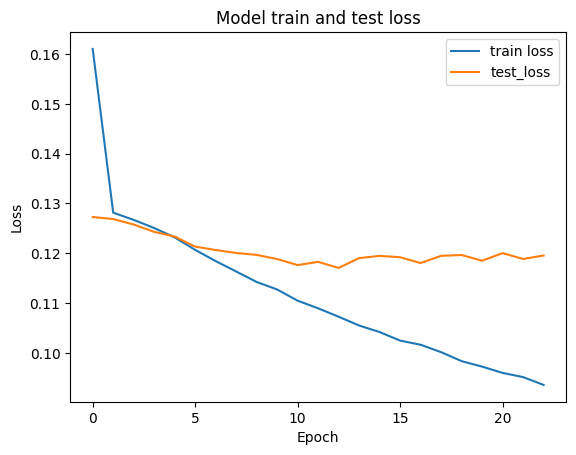

In [35]:
from matplotlib import pyplot as plt

plt.title('Model train and test loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test_loss')
plt.legend()
plt.show()